
In this notebook, You will do amazon review classification with BERT.[Download data from [this](https://www.kaggle.com/snap/amazon-fine-food-reviews/data) link]
<pre> 
It contains 5 parts as below.  Detailed instrctions are given in the each cell. please read every comment we have written. 
    1. Preprocessing 
    2. Creating a BERT model from the Tensorflow HUB.
    3. Tokenization
    4. getting the pretrained embedding Vector for a given review from the BERT.
    5. Using the embedding data apply NN and classify the reviews.
    6. Creating a Data pipeline for BERT Model. 

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. 
    If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List if we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>
</pre>

In [ ]:
# in this assignment you need two files reviews.csv and tokenization file
# you can use gdown module to import both the files in colab from Google drive
# the syntax is for gdown is !gdown --id file_id
# please run the below cell to import the required files

In [2]:
!wget --header="Host: doc-0g-9c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_p8ng40ui6dg1dboo687k0ln0l9bdve1h_nonce=81epfql8no8h2" --header="Connection: keep-alive" "https://doc-0g-9c-docs.googleusercontent.com/docs/securesc/v7anhv0sbps3rc90mmsv35gbkm697v4g/gva52hr9cej1l3jqon4mc67364ao4dv0/1648044300000/17557376798399779728/17557376798399779728/1hFpX414z--Z7UGsmDTjun6YI4S8ygnbY?e=download&ax=ACxEAsZB2BMU_CcD9M7twy19Zbxd8rKXkG-gBm0dg7Ob09E8Ax2Gq2v_E8B7FMRS78wmttfqNwVuu7CDSI2gRkGQWfqPo0hVHBNTQdMkbBggXL--sL-VNCT17gsUtlTpNMUzUOCdQNHf50XxVMZf1dfRtEfL0souU1PtmD83AjRKaEXN11jsWtkvAH6vwebh8Yy16BnTM6QNGGeo6DZLlBERaTOgjJR-Wik1DDcb-anZF9C-1axJZYsnZ_9mryMms6Z6n224fxLTLkF2a907EsHu0lToSNjJkdZjCck5JchSmfx1Qxq0FMc0p4QtblW6zkgtdmZUVxs1d3gAcr-p78Q90RE58xpmKcBegSDjvi8eZnYsQXoyv5f8HfFTYWHXBW3j9abOq1db-wQBpefqxtIX23_c5p9LFaKY0VO7fxXBQjnnZ6T1JN5Bg9_q9wAKXfAtRMrwSOTWnQuWsudlbNS7_s_FGiwRC9e2JUlTAt7Zq6pct16qaZQrs-PX39L_TiPUea0NjiVyJETpccoir4xaMLnQG6h4bNuTJZNhWPRR1R2w3h6HJgFNdiUybIBPzS5xKrV5qkAr6V00QiDckICKv7PosChPa_ezvhaLw8i6r_cb5FiZODLRnopyk3oCIZ0KsHK0jN8V4G0qnaAhVwHqCQ29UCfMFV2gG2BWEiw21CTn7Yxvj7n1IzAQBGxx9tOdh6U7v_4S6dfhYJsrzqpFN1rwm_UiPYEC2FthgqFmiWdLoyAw88gFYLJOwejL1uNderN3wEcfdDLcWpy3Vj-rwQ&authuser=0&nonce=81epfql8no8h2&user=17557376798399779728&hash=2nskq7i2ik9ararfc7n03vsvpe1gu0th" -c -O 'Copy of Reviews.csv'

--2022-03-23 14:06:12--  https://doc-0g-9c-docs.googleusercontent.com/docs/securesc/v7anhv0sbps3rc90mmsv35gbkm697v4g/gva52hr9cej1l3jqon4mc67364ao4dv0/1648044300000/17557376798399779728/17557376798399779728/1hFpX414z--Z7UGsmDTjun6YI4S8ygnbY?e=download&ax=ACxEAsZB2BMU_CcD9M7twy19Zbxd8rKXkG-gBm0dg7Ob09E8Ax2Gq2v_E8B7FMRS78wmttfqNwVuu7CDSI2gRkGQWfqPo0hVHBNTQdMkbBggXL--sL-VNCT17gsUtlTpNMUzUOCdQNHf50XxVMZf1dfRtEfL0souU1PtmD83AjRKaEXN11jsWtkvAH6vwebh8Yy16BnTM6QNGGeo6DZLlBERaTOgjJR-Wik1DDcb-anZF9C-1axJZYsnZ_9mryMms6Z6n224fxLTLkF2a907EsHu0lToSNjJkdZjCck5JchSmfx1Qxq0FMc0p4QtblW6zkgtdmZUVxs1d3gAcr-p78Q90RE58xpmKcBegSDjvi8eZnYsQXoyv5f8HfFTYWHXBW3j9abOq1db-wQBpefqxtIX23_c5p9LFaKY0VO7fxXBQjnnZ6T1JN5Bg9_q9wAKXfAtRMrwSOTWnQuWsudlbNS7_s_FGiwRC9e2JUlTAt7Zq6pct16qaZQrs-PX39L_TiPUea0NjiVyJETpccoir4xaMLnQG6h4bNuTJZNhWPRR1R2w3h6HJgFNdiUybIBPzS5xKrV5qkAr6V00QiDckICKv7PosChPa_ezvhaLw8i6r_cb5FiZODLRnopyk3oCIZ0KsHK0jN8V4G0qnaAhVwHqCQ29UCfMFV2gG2BWEiw21CTn7Yxvj7n1IzAQBGxx9tOdh6U7v_4S6dfhYJsrzqpFN1rwm_UiPYEC2Fthgq

In [ ]:
# !gdown --id 1GsD8JlAc_0yJ-1151LNr6rLw83RRUPgt
# !gdown --id 13exfXiyiByluh1PfYK1EyZyizqxeCVG9

In [3]:
# all imports
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, LSTM
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pickle
import datetime

In [4]:
!nvidia-smi

Wed Mar 23 14:06:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

<font size=4>Grader function 1 </font>

In [6]:
def grader_tf_version():
    assert((tf.__version__)>'2')
    return True
grader_tf_version()

True

<pre><font size=6>Part-1: Preprocessing</font></pre>

In [7]:
#Read the dataset - Amazon fine food reviews
reviews = pd.read_csv("/content/Reviews.csv")
#check the info of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
# get only 2 columns - Text, Score
# drop the NAN values

In [8]:
reviews = reviews[["Text","Score"]]

In [ ]:
#if score> 3, set score = 1
#if score<=2, set score = 0
#if score == 3, remove the rows. 

In [13]:
# extract data whose Score is not equal to 3 
reviews = reviews.loc[reviews['Score'] !=3 ]

# if score < 3, set score = 0
reviews['Score'] = reviews['Score'].replace([1,2], 0)
#reviews['Score'].replace([1,2], 0)

# if score > 3, set score = 1
reviews['Score'] = reviews['Score'].replace([4,5], 1)
#reviews['Score'].replace([4,5], 1)

In [14]:
reviews.head(5)

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


<font size=4>Grader function 2 </font>

In [15]:
reviews.shape

(525814, 2)

In [16]:
reviews.Score.value_counts()

1    443777
0     82037
Name: Score, dtype: int64

In [17]:
def grader_reviews():
    temp_shape = (reviews.shape == (525814, 2)) and (reviews.Score.value_counts()[1]==443777)
    assert(temp_shape == True)
    return True
grader_reviews()

True

In [18]:
def get_wordlen(x):
    return len(x.split())
reviews['len'] = reviews.Text.apply(get_wordlen)
reviews = reviews[reviews.len<50]
reviews = reviews.sample(n=100000, random_state=30)

In [19]:
# remove HTML from the Text
reviews['Text'].str.replace(r'<[^<>]*>', '', regex=True)

64117     The tea was of great quality and it tasted lik...
418112    My cat loves this.  The pellets are nice and s...
357829    Great product. Does not completely get rid of ...
175872    This gum is my favorite!  I would advise every...
178716    I also found out about this product because of...
                                ...                        
336657    Using this coffee and a stove top espresso mak...
498034    THE TASTE OF THIS M&M IS THE BEST. I USED IT I...
357766    Excellent Tea. I enjoy a cup every now and the...
326811    These oatmeal cookies have a great spice taste...
19261     This is the best coffee ever! I will never dri...
Name: Text, Length: 100000, dtype: object

In [20]:
# print head 5
reviews.head(5)

,Text,Score,len
64117,The tea was of great quality and it tasted lik...,1,30
418112,My cat loves this. The pellets are nice and s...,1,31
357829,Great product. Does not completely get rid of ...,1,41
175872,This gum is my favorite! I would advise every...,1,27
178716,I also found out about this product because of...,1,22


In [21]:
# split the data into train and test data(20%) with Stratify sampling, random state 33

X = reviews.drop(['Score', 'len'], axis=1)
Y = reviews['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=33, stratify=Y)

print(X_train.shape)
print(X_test.shape)

(80000, 1)
(20000, 1)


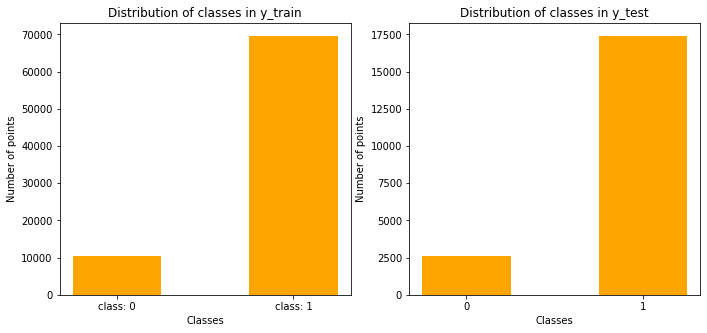

In [33]:
# plot bar graphs of y_train and y_test

y_train_plt = list(np.unique(y_train, return_counts=True)[1])  # number of train datapoints with class label 1 & 0
y_test_plt = list(np.unique(y_test, return_counts=True)[1])   # number of test datapoints with class label 1 & 0


fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)

plt.bar(['class: 0','class: 1'], y_train_plt, width=0.5, color='orange')
plt.title('Distribution of classes in y_train')
plt.xlabel('Classes')
plt.ylabel('Number of points')

plt.subplot(1,2,2,)
plt.subplots_adjust(left=0.01)
plt.bar(['0','1'],y_test_plt, width=0.5, color='orange')
plt.title('Distribution of classes in y_test')
plt.xlabel('Classes')
plt.ylabel('Number of points')

plt.show()

- From the above box plots we can be the data is highly unbalanced.

In [34]:
# saving to disk. if we need, we can load preprocessed data directly. 
reviews.to_csv('preprocessed.csv', index=False)

<pre><font size=6>Part-2: Creating BERT Model</font> 

If you want to know more about BERT, You can watch live sessions on Transformers and BERT.
we will strongly recommend you to read <a href="https://jalammar.github.io/illustrated-transformer/">Transformers</a>, <a href="https://arxiv.org/abs/1810.04805">BERT Paper</a> and, <a href="https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">This blog</a>.


For this assignment, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>. 
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

In [35]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


In [36]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 55)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 55)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 55)]         0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 55, 768)]                 'input_mask[0][0]',         

In [37]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

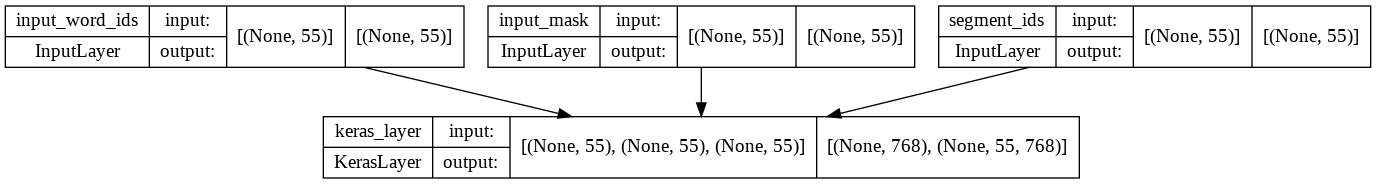

In [38]:
plot_model(bert_model, to_file='bert_model.png', show_shapes=True)

<pre><font size=6>Part-3: Tokenization</font></pre>

In [39]:
# getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [40]:
# if you are getting error for sentencepiece module you can install it using below command while running this cell for the first time
!pip install sentencepiece
# tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case )

     |████████████████████████████████| 1.2 MB 5.2 MB/s 


In [41]:
# import tokenization #We have given tokenization.py file
import sys
import os

py_file_location = "/content/"
sys.path.append(os.path.abspath(py_file_location))

In [42]:
import tokenization

In [43]:
# Create tokenizer " Instantiate FullTokenizer" 
# name must be "tokenizer"
# the FullTokenizer takes two parameters 1. vocab_file and 2. do_lower_case 
# we have created these in the above cell ex: FullTokenizer(vocab_file, do_lower_case )
# please check the "tokenization.py" file the complete implementation
tokenizer = tokenization.FullTokenizer(vocab_file,do_lower_case )

<font size=4>Grader function 3 </font>

In [44]:
#it has to give no error 
def grader_tokenize(tokenizer):
    out = False
    try:
        out=('[CLS]' in tokenizer.vocab) and ('[SEP]' in tokenizer.vocab)
    except:
        out = False
    assert(out==True)
    return out
grader_tokenize(tokenizer)

True

In [ ]:
# Create train and test tokens (X_train_tokens, X_test_tokens) from (X_train, X_test) using Tokenizer and 

# add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens. 

# maximum number of tokens is 55(We already given this to BERT layer above) so shape is (None, 55)

# if it is less than 55, add '[PAD]' token else truncate the tokens length.(similar to padding)

# Based on padding, create the mask for Train and Test ( 1 for real token, 0 for '[PAD]'), 
# it will also same shape as input tokens (None, 55) save those in X_train_mask, X_test_mask

# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)

# type of all the above arrays should be numpy arrays

# after execution of this cell, you have to get 
# X_train_tokens, X_train_mask, X_train_segment
# X_test_tokens, X_test_mask, X_test_segment

In [45]:
# https://www.analyticsvidhya.com/blog/2021/09/an-explanatory-guide-to-bert-tokenizer/
def inputs_of_bert_model(input_data, tokenizer):

    tokens_of_input_data = []
    mask_of_input_data = []
    segment_of_input_data = []

    for review in input_data.Text:
        tokens = tokenizer.tokenize(review) # split words from review
        if len(tokens) > 53:                # if length of > 53 then slice the length
            tokens = tokens[:53]
        tokens = ['[CLS]',*tokens,'[SEP]']  # add ['CLS'] & ['SEP'] accordingly

        if len(tokens) < 55:         
            while len(tokens) < 55:         # add the word ['PAD'] in remaining places
                tokens.append('[PAD]')                         
        
        mask_array = []
        for token in tokens:
            if token != '[PAD]':            # fill mask_array with 0 in place of ['PAD'] and 1 otherwise
                mask_array.append(1)
            else:
                mask_array.append(0)
        mask_of_input_data.append(mask_array)
    
        tokens = tokenizer.convert_tokens_to_ids(tokens) # adding positional encoding to words
        tokens_of_input_data.append(tokens)    
    
        segments_array = [0] * 55                 # since inputting only 1 sentence giving segments as all zeroes
        segment_of_input_data.append(segments_array)

    input_data_tokens  =  np.array(tokens_of_input_data)
    input_data_mask    =  np.array(mask_of_input_data)
    input_data_segment =  np.array(segment_of_input_data)

    return input_data_tokens,input_data_mask,input_data_segment

In [46]:
# Train_data inputs for BERT
X_train_tokens, X_train_mask, X_train_segment = inputs_of_bert_model(X_train, tokenizer)

# Test_data inputs for BERT
X_test_tokens, X_test_mask, X_test_segment = inputs_of_bert_model(X_test, tokenizer)

#### Example
<img src='https://i.imgur.com/5AhhmgU.png'>

In [ ]:
#import pickle

In [47]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('train_data.pkl','wb'))
pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('test_data.pkl','wb'))

In [ ]:
#you can load from disk
#X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("train_data.pkl", 'rb')) 
#X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("test_data.pkl", 'rb')) 

<font size=4>Grader function 4 </font>

In [48]:
def grader_alltokens_train():
    out = False
    
    if type(X_train_tokens) == np.ndarray:
        
        temp_shapes = (X_train_tokens.shape[1]==max_seq_length) and (X_train_mask.shape[1]==max_seq_length) and \
        (X_train_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_train_segment)
        
        mask_temp = np.sum(X_train_mask==0) == np.sum(X_train_tokens==0)
        
        no_cls = np.sum(X_train_tokens==tokenizer.vocab['[CLS]'])==X_train_tokens.shape[0]
        
        no_sep = np.sum(X_train_tokens==tokenizer.vocab['[SEP]'])==X_train_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out

grader_alltokens_train()

True

<font size=4>Grader function 5 </font>

In [49]:
def grader_alltokens_test():
    out = False
    if type(X_test_tokens) == np.ndarray:
        
        temp_shapes = (X_test_tokens.shape[1]==max_seq_length) and (X_test_mask.shape[1]==max_seq_length) and \
        (X_test_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_test_segment)
        
        mask_temp = np.sum(X_test_mask==0) == np.sum(X_test_tokens==0)
        
        no_cls = np.sum(X_test_tokens==tokenizer.vocab['[CLS]'])==X_test_tokens.shape[0]
        
        no_sep = np.sum(X_test_tokens==tokenizer.vocab['[SEP]'])==X_test_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out
grader_alltokens_test()

True

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3. 
We will utlize those two and will get the embeddings for each sentence in the 
Train and test data.</pre>

In [50]:
bert_model.input

[<KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'segment_ids')>]

In [51]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [52]:
# get the train output, BERT model will give one output so save in
# X_train_pooled_output
# this cell will take some time to execute, make sure thay you have stable internet connection
X_train_pooled_output = bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

In [53]:
# get the test output, BERT model will give one output so save in
# X_test_pooled_output
X_test_pooled_output = bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

In [54]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train_pooled_output, X_test_pooled_output),open('final_output.pkl','wb'))

In [ ]:
#X_train_pooled_output, X_test_pooled_output= pickle.load(open('final_output.pkl', 'rb'))

<font size=4>Grader function 6 </font>

In [55]:
#now we have X_train_pooled_output, y_train
#X_test_pooled_ouput, y_test

#please use this grader to evaluate
def greader_output():
    assert(X_train_pooled_output.shape[1]==768)
    assert(len(y_train)==len(X_train_pooled_output))
    assert(X_test_pooled_output.shape[1]==768)
    assert(len(y_test)==len(X_test_pooled_output))
    assert(len(y_train.shape)==1)
    assert(len(X_train_pooled_output.shape)==2)
    assert(len(y_test.shape)==1)
    assert(len(X_test_pooled_output.shape)==2)
    return True
greader_output()

True

<pre><font size=6>Part-5: Training a NN with 768 features</font>

Create a NN and train the NN. 
1.<b> You have to use AUC as metric. Do not use tf.keras.metrics.AUC</b> 
<b> You have to write custom code for AUC and print it at the end of each epoch</b> 
2. You can use any architecture you want. 
3. You have to use tensorboard to log all your metrics and Losses. You have to send those logs. 
4. Print the loss and metric at every epoch. 
5. You have to submit without overfitting and underfitting. 
</pre>

In [ ]:
##imports

In [56]:
##create an Neural Network and train your model on X_train_pooled_output and y_train
# you can start as follows
input_layer = Input(shape=(X_train_pooled_output.shape[1],))

layer_1 = Dense(512, 
                activation='relu',
                kernel_initializer='he_normal', 
                kernel_regularizer=tf.keras.regularizers.L2(0.01))(input_layer)

layer_2 = Dense(256, 
                activation='relu',
                kernel_initializer='he_normal',
                kernel_regularizer=tf.keras.regularizers.L2(0.01))(layer_1)

layer_3 = Dense(128, 
                activation='relu',
                kernel_initializer='he_normal',
                kernel_regularizer=tf.keras.regularizers.L2(0.01))(layer_2)

layer_4 = Dense(64, 
                activation='relu',
                kernel_initializer='he_normal',
                kernel_regularizer=tf.keras.regularizers.L2(0.01))(layer_3)

output_layer = Dense(2, activation='softmax')(layer_4)

In [57]:
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 512)               393728    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 566,338
Trainable params: 566,338
Non-trainab

In [58]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

In [59]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [60]:
# https://www.tensorflow.org/tensorboard/get_started
# Tensorboard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

# AUC score 
def auc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [61]:
# converting y_train and y_test to one hot encoded values
Y_train_1_hot_encode = to_categorical(y_train)
Y_test_1_hot_encode = to_categorical(y_test)

In [62]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', auc])

In [63]:
model.fit(X_train_pooled_output, Y_train_1_hot_encode,
          epochs=15,
          batch_size=128,
          validation_data=(X_test_pooled_output, Y_test_1_hot_encode),
          callbacks=[tensorboard_callback])

Epoch 1/15
625/625 [==============================] - 9s 11ms/step - loss: 1.9883 - accuracy: 0.8770 - auc: 0.8592 - val_loss: 0.4121 - val_accuracy: 0.9027 - val_auc: 0.9023
Epoch 2/15
625/625 [==============================] - 7s 11ms/step - loss: 0.3378 - accuracy: 0.8958 - auc: 0.9237 - val_loss: 0.3097 - val_accuracy: 0.9141 - val_auc: 0.9269
Epoch 3/15
625/625 [==============================] - 6s 10ms/step - loss: 0.2995 - accuracy: 0.9043 - auc: 0.9361 - val_loss: 0.2752 - val_accuracy: 0.9130 - val_auc: 0.9334
Epoch 4/15
625/625 [==============================] - 7s 11ms/step - loss: 0.2810 - accuracy: 0.9107 - auc: 0.9416 - val_loss: 0.2829 - val_accuracy: 0.9208 - val_auc: 0.9359
Epoch 5/15
625/625 [==============================] - 7s 10ms/step - loss: 0.2756 - accuracy: 0.9113 - auc: 0.9426 - val_loss: 0.2769 - val_accuracy: 0.9169 - val_auc: 0.9384
Epoch 6/15
625/625 [==============================] - 7s 11ms/step - loss: 0.2650 - accuracy: 0.9159 - auc: 0.9446 - val_loss

In [74]:
train_auc, test_auc, train_accuracy, val_accuracy = 0.9524, 0.9446,  0.9172,  0.9132

In [ ]:
%tensorboard --logdir logs/fit

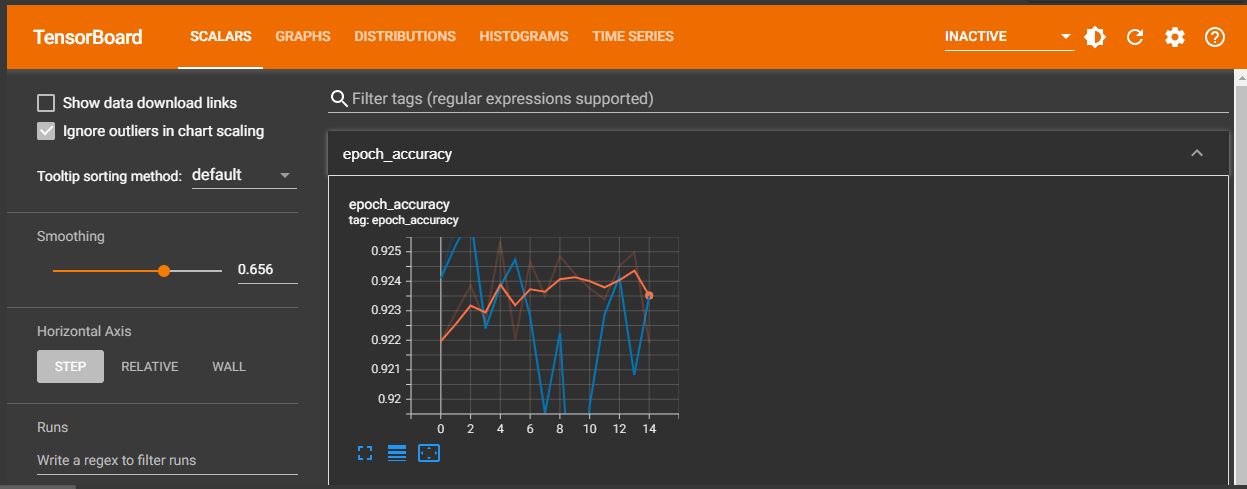

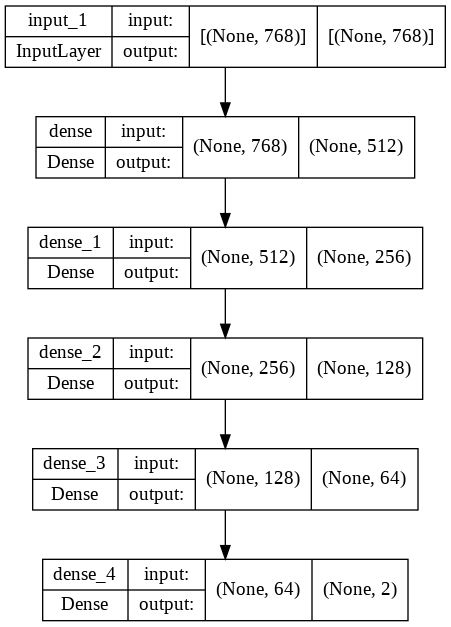

In [65]:
plot_model(model, to_file='model.png', show_shapes=True)

<Pre><font size=6>Part-6: Creating a Data pipeline for BERT Model</font> 
1. Pipeline is a way to codify and automate the workflow.
2. Download the test.csv file from here <a href="https://drive.google.com/file/d/1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo/view?usp=sharing">here</a> </pre>


In [ ]:
#there is an alterante way to load files from Google drive directly to your Colab session
# you can use gdown module to import the files as follows
#for example for test.csv you can write your code as !gdown --id file_id (remove the # from next line and run it)

In [66]:
# read the csv file
test_df = pd.read_csv('/content/test.csv')

In [67]:
test_df.head(5)

,Text
0,Just opened Greenies Joint Care (individually ...
1,This product rocks :) My mom was very happy w/...
2,"The product was fine, but the cost of shipping..."
3,I love this soup. It's great as part of a meal...
4,Getting ready to order again. These are great ...


<Pre>1. You have to write a function that takes the test_df,trained model and the required parameters as input. 
2. Perform all the preproceesing steps inside the function.
- Remove all the html tags
- Now do tokenization [Part 3 as mentioned above]
- Create tokens,mask array and segment array
- Get Embeddings from BERT Model [Part 4 as mentioned above] , let it be X_test
- Print the shape of output(X_test.shape).You should get (352,768)
3. Predit the output of X_test with the neural network model which we trained earlier.

4. Return the occurences of class labels from the function.
The output should be the count of datapoints classified as 1 or 0.

</pre>

In [68]:
def test_data_embed(input_data, model, tokenizer):
    
    input_data.dropna(subset = ["Text"], inplace=True)                                  # remove datapoints with Nan values
    input_data['Text'] = input_data['Text'].str.replace(r'<[^<>]*>', '', regex=True)    # remove HTML tags

    # Input for BERT    
    tokens, mask_arr, segment_arr = inputs_of_bert_model(input_data, tokenizer)

    # Embedding using BERT
    X_test = model.predict([tokens, mask_arr, segment_arr])
    print('The shape of X_test after embedding(BERT model):', X_test.shape)

    return X_test

In [69]:
X_test = test_data_embed(test_df, bert_model, tokenizer)

The shape of X_test after embedding(BERT model): (352, 768)


In [70]:
# predicting class label from previously trained network
pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

In [71]:
datapoints = np.unique(pred_y,return_counts=True)
print('The number of positively classified points are: ', datapoints[1][1])
print('The number of negatively classified points are: ', datapoints[1][0])

The number of positively classified points are:  287
The number of negatively classified points are:  65


In [72]:
test_df['predicted_y'] = pred_y
test_df.head(10)

,Text,predicted_y
0,Just opened Greenies Joint Care (individually ...,0
1,This product rocks :) My mom was very happy w/...,1
2,"The product was fine, but the cost of shipping...",0
3,I love this soup. It's great as part of a meal...,1
4,Getting ready to order again. These are great ...,1
5,"These were delicious, but not wrapped as well ...",0
6,I will never again even CONSIDER a dog food wi...,0
7,If you need something to take with you to keep...,1
8,My husband puts this on everything. It is very...,1
9,This is a movie the whole family can watch tog...,1


## Please write your observations at the end of notebook and  explain each and every step you followed in solving this assignment.

In [75]:
# Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Train AUC", "Validation AUC", "Accuracy", "Validation accuracy"]
x.add_row([round(train_auc, 2), round(test_auc, 2), round(train_accuracy, 2), round(val_accuracy, 2)])

print(x)

+-----------+----------------+----------+---------------------+
| Train AUC | Validation AUC | Accuracy | Validation accuracy |
+-----------+----------------+----------+---------------------+
|    0.95   |      0.94      |   0.92   |         0.91        |
+-----------+----------------+----------+---------------------+


<pre>
<h2>Observations</h2>
For this assignment, we used the small BERT model (uncased model) for Vectorization.
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads.

<h4>Steps:</h4>

- We first preprocessed the input dataset, then we split it for training and testing.

- We then downloaded the BERT uncased model from TensorFlow HUB and built the model.

- BERT requires three inputs: word_ids/tokens, input mask, and segment_ids.
- All three inputs are limited to 55 characters.
- Padding was performed if the length of input was less than 55 and truncations if the length of input was 
  greater than 55

- We created the word_ids and tokens by using the tokenizer module, which has functions for converting words into tokens 
  and for positional encoding.

- By filling in 0's to the padded areas (represented by 'PAD') and 1's to the remaining areas, a mask input was created.
  The segment_ids were set to all zeroes since we are only providing one sentence at a time here.

- This resulted in 768-dimensional output.

- In the next step, a simple neural network was created with the embedding and trained for 15 epochs.
  Which gave AUC score of 95%.
</pre>